In [1]:
#import liberies
import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import  preprocessing ,pipeline,linear_model

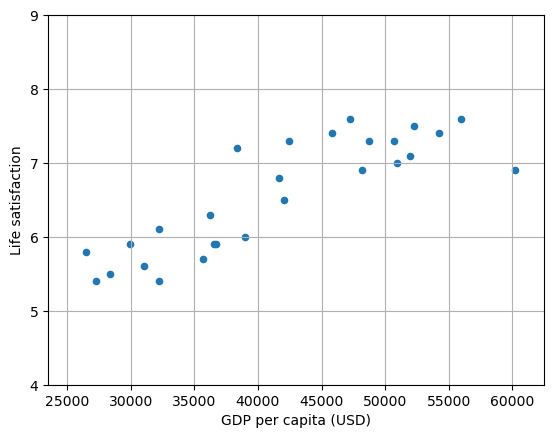

[[6.30165767]]


In [2]:
#prepare the data
lifesat=pd.read_csv("data/lifesat.csv")
oecd_bli = pd.read_csv( "data/oecd_bli.csv")
gdp_per_capita = pd.read_csv("data/gdp_per_capita.csv")

x=lifesat[["GDP per capita (USD)"]].values
y=lifesat[["Life satisfaction"]].values

#visualize the data
lifesat.plot(kind='scatter',grid=True,x="GDP per capita (USD)",y="Life satisfaction")
plt.axis([23_500,62_500,4,9])
plt.show()

#select a linear model
model=LinearRegression()

#train the model
model.fit(x,y)

#make a prediction
x_new=[[37_655.2]]#GDP per capita in 2020
print(model.predict(x_new))

In [3]:
#sorting data by year
gdp_year=2020
gdppc_col="GDP per capita (USD)"
lifesat_col= "Life satisfaction"

gdp_per_capita=gdp_per_capita[gdp_per_capita['Year']==gdp_year]
gdp_per_capita=gdp_per_capita.drop(['Code','Year'],axis=1)
gdp_per_capita.columns=["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [4]:
#filter data
oecd_bli=oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
#country as row, indicator as columns
oecd_bli=oecd_bli.pivot(index='Country',columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [5]:
#merge GDP & lifesat
full_country_stats=pd.merge(left=oecd_bli,right=gdp_per_capita,left_index=True,right_index=True)
full_country_stats.sort_values(by=gdppc_col,inplace=True)
full_country_stats=full_country_stats[[gdppc_col,lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [6]:
#select the in range data
min_gdp = 23_500
max_gdp = 62_500

country_stats=full_country_stats[(full_country_stats[gdppc_col]>=min_gdp)&(full_country_stats[gdppc_col]<=max_gdp)]

country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [7]:
#import data
country_stats.to_csv("data/lifesat.csv")
full_country_stats.to_csv("data/lifesat_full.csv")

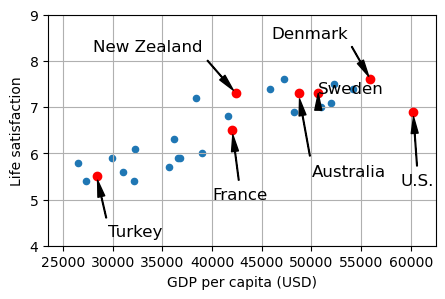

In [8]:
#scatter plot visualization
country_stats.plot(kind='scatter',figsize=(5,3), grid=True,x=gdppc_col,y=lifesat_col)

min_life_sat=4
max_life_sat=9

position_text = {
    "Turkey": (29_500, 4.2),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5),
    "Sweden":(50683.323510,7.3)
    
}

for country ,pos_text in position_text.items():
    pos_data_x=country_stats[gdppc_col].loc[country]
    pos_data_y=country_stats[lifesat_col].loc[country]
    country="U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),  xytext=pos_text, fontsize=12,arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x,pos_data_y,"ro")
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [9]:
highlighted_countres=country_stats.loc[list(position_text.keys())]
highlighted_countres[[gdppc_col,lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Sweden,50683.323510,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


In [10]:
#scatter plot for GDP & lifesat
x_sample=country_stats[[gdppc_col]].values
y_sample=country_stats[[lifesat_col]].values

lin1=LinearRegression()
lin1.fit(x_sample,y_sample)

#compute regression line (best fit line)
t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


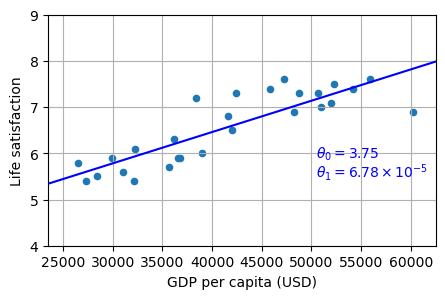

In [11]:
##scatter plot visualization
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)
x=np.linspace(min_gdp,max_gdp,1000)
plt.plot(x,t0+t1*x,"b")

plt.text(max_gdp - 12_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 12_000, min_life_sat + 1.5,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp,max_gdp,min_life_sat,max_life_sat])
plt.show()

In [12]:
#get GDP value for cyprus
cyprus_gdp_per_capita=gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

37655.1803457421

In [13]:
# predict life satisfaction for cyprus
cyprus_predicted_life_satisfaction=lin1.predict([[cyprus_gdp_per_capita]])[0,0]
cyprus_predicted_life_satisfaction

6.301656332738056

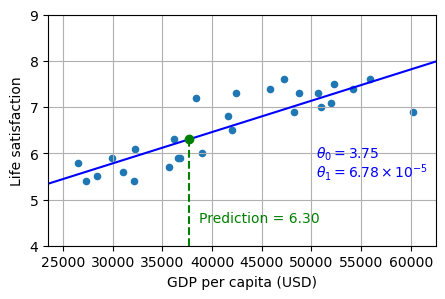

In [14]:
#scatter plot visualization
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)
x=np.linspace(min_gdp,max_gdp,1000)
plt.plot(x,t0+t1*x,"b")

plt.text(max_gdp - 12_000, min_life_sat + 1.9,fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 12_000, min_life_sat + 1.5,fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita,cyprus_gdp_per_capita],[min_life_sat,cyprus_predicted_life_satisfaction],"g--")
plt.text(cyprus_gdp_per_capita + 1000, 4.5,fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="g")
plt.plot(cyprus_gdp_per_capita,cyprus_predicted_life_satisfaction,"go")

plt.axis([min_gdp,max_gdp,min_life_sat,max_life_sat])
plt.show()

In [15]:
# find the mising data
mising_data=full_country_stats[(full_country_stats[gdppc_col]>=min_gdp) | (full_country_stats[gdppc_col]<=max_gdp)]
mising_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9


In [16]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

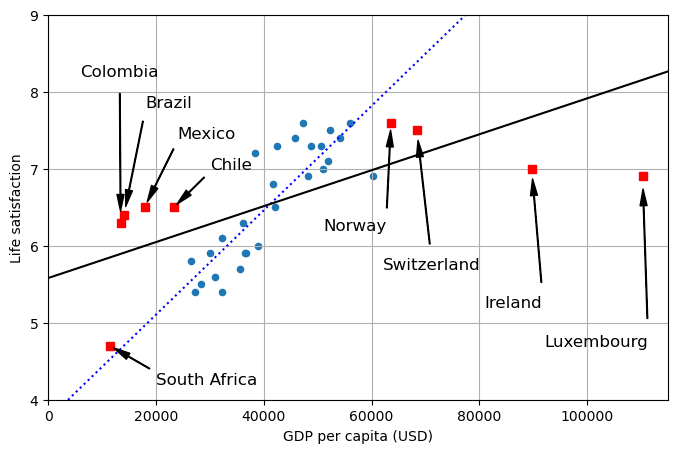

In [17]:
#scatter plot visualization
full_country_stats.plot(kind="scatter",figsize=(8,5),grid=True,x=gdppc_col,y=lifesat_col)

for country , pos_text in position_text_missing_countries.items():
    pos_data_x,pos_data_y=mising_data.loc[country]
    plt.annotate(country,xy=(pos_data_x,pos_data_y),xytext=pos_text,fontsize=12,arrowprops=dict(facecolor='black', width=0.5,shrink=0.08, headwidth=5))
    plt.plot(pos_data_x,pos_data_y,"rs")
    
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full =LinearRegression()
x_full=np.c_[full_country_stats[gdppc_col]]
y_full=np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(x_full,y_full)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_.ravel()[0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

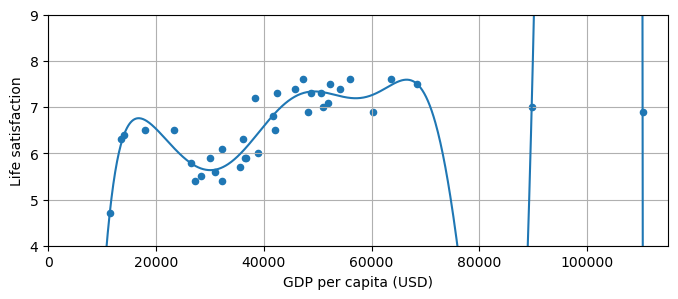

In [18]:
#scatter plot visualization
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(x_full, y_full)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])


plt.show()

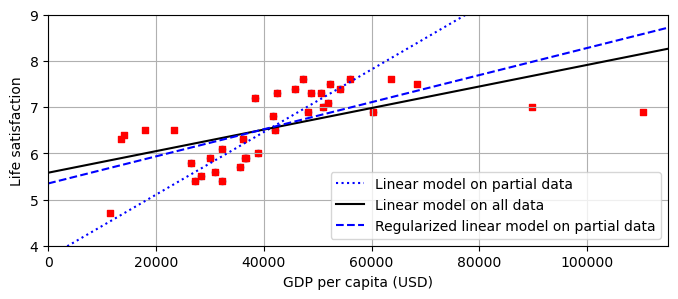

In [19]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
mising_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_.ravel()[0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()